 # Diabetes Prediction System- Machine Learning Project

In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

 ## Data Collection and Analysis

In [21]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset =pd.read_csv('diabetes.csv')

In [22]:
#printing the first 5 row of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
diabetes_dataset.shape

(768, 9)

In [28]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [30]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [32]:
df= diabetes_dataset.groupby('Outcome').mean().T
df['%diff']=(abs(df[0]-df[1]) / ((df[0]+df[1])/2))*100
df

Outcome,0,1,%diff
Pregnancies,3.298000,4.865672,38.406044
Glucose,109.980000,141.257463,24.898725
BloodPressure,68.184000,70.824627,3.799227
SkinThickness,19.664000,22.164179,11.954520
Insulin,68.792000,100.335821,37.301753
BMI,30.304200,35.142537,14.785572
DiabetesPedigreeFunction,0.429734,0.550500,24.640239
Age,31.190000,37.067164,17.220651


In [34]:
data= diabetes_dataset.drop(columns='Outcome',axis=1)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

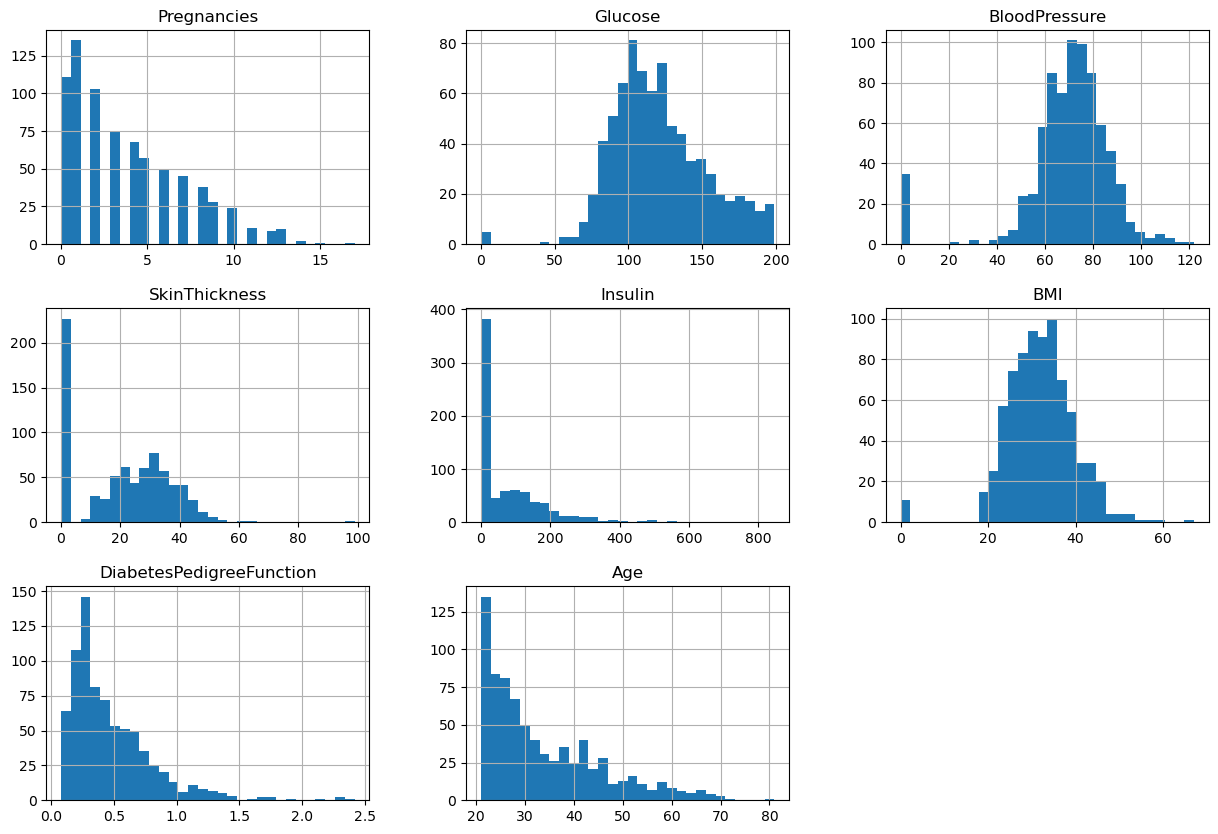

In [37]:
data.hist(bins=30,figsize=(15,10))
plt.show()

In [38]:
corr_matrix=data.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


<Axes: >

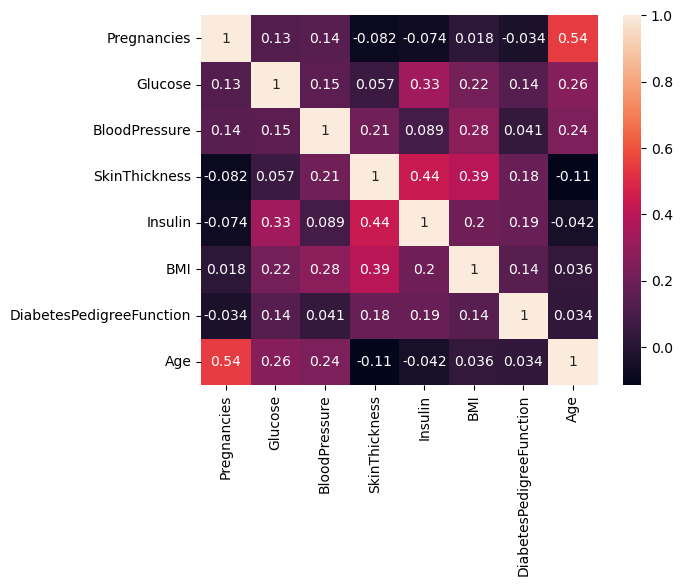

In [40]:
sns.heatmap(corr_matrix,annot=True)

In [41]:
# separating the data and labels
X= diabetes_dataset.drop(columns='Outcome',axis=1)
Y=diabetes_dataset['Outcome']

In [42]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [45]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# feature scaling

In [51]:
scaler= StandardScaler()

In [53]:
scaler.fit(X)

StandardScaler()

In [55]:
standardized_data =scaler.transform(X)

In [57]:
    X_scaled =scaler.fit_transform(X)

In [59]:
print(X_scaled)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


# splitting the data trainning and testing -train and test spit

In [62]:
from sklearn.model_selection import train_test_split


In [64]:

X_train,X_test,Y_train,Y_test= train_test_split(X_scaled,Y,test_size=0.2, stratify=Y, random_state=42) 


In [66]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


In [68]:
X_test

array([[ 0.93691372,  1.19259239, -0.26394125, ..., -0.58288655,
        -0.53720754,  0.57511787],
       [ 1.82781311, -1.65544783,  1.90736425, ...,  0.44515934,
        -0.56438861,  1.17073215],
       [-0.54791859,  0.03459802,  0.35643175, ...,  0.49592704,
         0.03359489, -0.61611067],
       ...,
       [-0.54791859, -1.2172878 , -0.88431425, ..., -0.44327538,
         3.7060592 , -0.70119842],
       [ 0.04601433,  1.97502103,  0.45982725, ...,  0.63553821,
        -0.6278111 , -0.19067191],
       [-0.84488505, -1.5615564 ,  0.45982725, ...,  0.15324507,
        -0.15063235, -1.04154944]])

In [70]:
Y_test

44     0
672    0
700    0
630    1
81     0
      ..
32     0
637    0
593    0
425    1
273    0
Name: Outcome, Length: 154, dtype: int64

In [72]:
X_train

array([[-0.84488505, -0.96691063, -0.36733675, ..., -0.6082704 ,
         0.3265464 , -0.78628618],
       [ 0.3429808 ,  0.1597866 ,  0.45982725, ..., -0.30366421,
        -0.09929033,  0.57511787],
       [-0.54791859, -0.49745345, -0.57412775, ...,  0.36900779,
        -0.74559573, -0.70119842],
       ...,
       [-0.84488505, -0.74783062,  0.04624525, ...,  0.77514938,
        -0.76673656, -0.27575966],
       [ 1.82781311, -0.30967058,  0.04624525, ..., -0.57019463,
        -0.9992857 ,  0.57511787],
       [ 0.04601433,  0.72313521, -0.57412775, ..., -0.31635613,
        -0.55834837,  0.31985461]])

In [74]:
Y_train

353    0
711    0
373    0
46     0
682    0
      ..
451    1
113    0
556    0
667    1
107    0
Name: Outcome, Length: 614, dtype: int64

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

log_reg_model = LogisticRegression()
dec_tree_model= DecisionTreeClassifier()
rf_model= RandomForestClassifier()
svm_model= SVC()
knn_model= KNeighborsClassifier()
gbc_model=GradientBoostingClassifier()

In [78]:
log_reg_model.fit(X_train,Y_train)
dec_tree_model.fit(X_train,Y_train)
rf_model.fit(X_train,Y_train)
svm_model.fit(X_train,Y_train)
knn_model.fit(X_train,Y_train)
gbc_model.fit(X_train,Y_train)

GradientBoostingClassifier()

In [79]:
y_pred=log_reg_model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0],
      dtype=int64)

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.7142857142857143

In [84]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



In [86]:
from sklearn.metrics import classification_report

In [88]:
round(log_reg_model.score(X_train, Y_train) * 100, 2)


79.15

In [90]:
round(log_reg_model.score(X_test,Y_test)*100,2)

71.43

In [92]:
print(f"Training Accuracy Logistic Regression={round(log_reg_model.score(X_train, Y_train) * 100, 2)}%")
print(f"Testing Accuracy Logistic Regression={round(log_reg_model.score(X_test, Y_test) * 100, 2)}%")


Training Accuracy Logistic Regression=79.15%
Testing Accuracy Logistic Regression=71.43%


In [94]:
print(f"Training Accuracy Decision Tree ={round(dec_tree_model.score(X_train,Y_train)*100,2)}%")
print(f"Testing Accuracy Decision Tree ={round(dec_tree_model.score(X_test,Y_test)*100,2)}%")


Training Accuracy Decision Tree =100.0%
Testing Accuracy Decision Tree =71.43%


In [96]:
print(f"Training Accuracy Random Forest ={round(dec_tree_model.score(X_train,Y_train)*100,2)}%")
print(f"Testing Accuracy Random Forest ={round(dec_tree_model.score(X_test,Y_test)*100,2)}%")


Training Accuracy Random Forest =100.0%
Testing Accuracy Random Forest =71.43%


In [98]:
print(f"Training Accuracy SVM ={round(dec_tree_model.score(X_train,Y_train)*100,2)}%")
print(f"Testing Accuracy SVM ={round(dec_tree_model.score(X_test,Y_test)*100,2)}%")


Training Accuracy SVM =100.0%
Testing Accuracy SVM =71.43%


In [100]:
print(f"Training Accuracy Gradient Boost ={round(dec_tree_model.score(X_train,Y_train)*100,2)}%")
print(f"Testing Accuracy Gradient Boost ={round(dec_tree_model.score(X_test,Y_test)*100,2)}%")


Training Accuracy Gradient Boost =100.0%
Testing Accuracy Gradient Boost =71.43%


In [102]:
print(f"Training Accuracy KNN ={round(dec_tree_model.score(X_train,Y_train)*100,2)}%")
print(f"Testing Accuracy KNN ={round(dec_tree_model.score(X_test,Y_test)*100,2)}%")


Training Accuracy KNN =100.0%
Testing Accuracy KNN =71.43%


# Cross Validation

In [105]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [107]:
cross_val_score(log_reg_model,X_scaled,Y,cv=StratifiedKFold(n_splits=5))

array([0.77272727, 0.74675325, 0.75324675, 0.81699346, 0.76470588])

In [109]:
cross_val_score(log_reg_model,X_scaled,Y,cv=StratifiedKFold(n_splits=5)).mean()

0.7708853238265002

In [111]:
dec=cross_val_score(dec_tree_model,X_scaled,Y,cv=StratifiedKFold(n_splits=5)).mean()
rf=cross_val_score(rf_model,X_scaled,Y,cv=StratifiedKFold(n_splits=5)).mean()
svm=cross_val_score(svm_model,X_scaled,Y,cv=StratifiedKFold(n_splits=5)).mean()
knn=cross_val_score(knn_model,X_scaled,Y,cv=StratifiedKFold(n_splits=5)).mean()
gbc=cross_val_score(gbc_model,X_scaled,Y,cv=StratifiedKFold(n_splits=5)).mean()


In [112]:

print(f"Mean cross Validation Accuracy-Decision Tree={round(dec*100,2)}%")
print(f"Mean cross Validation Accuracy-Random Forest= {round(rf*100,2)}%")
print(f"Mean cross Validation Accuracy-SVM={round(svm*100,2)}%")
print(f"Mean cross Validation Accuracy-KNN={round(knn*100,2)}%")
print(f"Mean cross Validation Accuracy-Gradient Boost={round(gbc*100,2)}%")

Mean cross Validation Accuracy-Decision Tree=71.1%
Mean cross Validation Accuracy-Random Forest= 75.66%
Mean cross Validation Accuracy-SVM=77.09%
Mean cross Validation Accuracy-KNN=73.31%
Mean cross Validation Accuracy-Gradient Boost=75.79%


# Predictive System using SVM model

In [114]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [115]:
preg=int(input("Enter the 'Pregnancies'=",))
gcs=float(input("Enter the 'Glucose'=",))
bp=float(input("Enter the 'Blood Pressure'=",))
st=float(input("Enter the 'Ski Thickness'=",))
ins=float(input("Enter the 'Insulin'=",))
bmi=float(input("Enter the 'BMI'=",))
dpf=float(input("Enter the 'Diabetes Pedigree Function'=",))
age=float(input("Enter the 'Age'=",))
patients_data=[preg,gcs,bp,st,ins,bmi,dpf,age]
patients_data

Enter the 'Pregnancies'= 1
Enter the 'Glucose'= 120
Enter the 'Blood Pressure'= 140
Enter the 'Ski Thickness'= 34
Enter the 'Insulin'= 89
Enter the 'BMI'= 23.3
Enter the 'Diabetes Pedigree Function'= 0.67
Enter the 'Age'= 45


[1, 120.0, 140.0, 34.0, 89.0, 23.3, 0.67, 45.0]

In [116]:
input_array =np.asarray(patients_data)
input_array

array([  1.  , 120.  , 140.  ,  34.  ,  89.  ,  23.3 ,   0.67,  45.  ])

In [122]:
input_data_reshaped=input_array.reshape(1,-1)
input_data_reshaped

array([[  1.  , 120.  , 140.  ,  34.  ,  89.  ,  23.3 ,   0.67,  45.  ]])

In [127]:
std_data= scaler.transform(input_data_reshaped)
std_data

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.84488505, -0.02799627,  3.66508775,  0.84454186,  0.07988716,
        -1.10325546,  0.59835708,  1.00055664]])

In [133]:
prediction =svm_model.predict(std_data)
prediction

array([0], dtype=int64)

In [151]:
prediction[0]

0

In [149]:
if(prediction[0]==0):
    print("The person is not diabetic")
else:
    print("The person is diabetic")

The person is not diabetic


# Predictive System

In [160]:
## Predictive System using svm
#input_Data=(5,166,19,175,25.8,0.587,51)
#input_data=[1,86,100,15,22.4,0.567,32]

import warnings
warnings.filterwarnings('ignore')

preg=int(input("Enter the 'Pregnancies'=",))
gcs=float(input("Enter the 'Glucose'=",))
bp=float(input("Enter the 'Blood Pressure'=",))
st=float(input("Enter the 'Ski Thickness'=",))
ins=float(input("Enter the 'Insulin'=",))
bmi=float(input("Enter the 'BMI'=",))
dpf=float(input("Enter the 'Diabetes Pedigree Function'=",))
age=float(input("Enter the 'Age'=",))


patients_data=[preg,gcs,bp,st,ins,bmi,dpf,age]
input_array=np.asarray(patients_data)
input_data_reshaped=input_array.reshape(1,-1)
std_data= scaler.transform(input_data_reshaped)
prediction =svm_model.predict(std_data)
print("              ")
print("**********Machine Learning Model Prediction******")
if(prediction[0]==0):
    print("Result - Negative")
    print("The person is not diabetic")
else:
    print("Result -Positive")
    print("The person is diabetic")  


Enter the 'Pregnancies'= 5
Enter the 'Glucose'= 166
Enter the 'Blood Pressure'= 72
Enter the 'Ski Thickness'= 19
Enter the 'Insulin'= 175
Enter the 'BMI'= 25.8
Enter the 'Diabetes Pedigree Function'= 0.587
Enter the 'Age'= 51


              
**********Machine Learning Model Prediction******
Result -Positive
The person is diabetic
